In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
before_js_data = pd.read_csv('Before_Jane_Street_Ban.csv')
after_js_data = pd.read_csv('After_Jane_Street_Ban.csv')
before_js_df = pd.DataFrame(before_js_data)
after_js_df = pd.DataFrame(after_js_data)
before_js_df.describe()

,open,high,low,close,volume
count,375.000000,375.000000,375.000000,375.000000,375.000000
mean,25589.913600,25598.780000,25579.901067,25589.306133,73096.200000
std,75.651346,75.792249,75.660274,75.104872,66325.508684
min,25418.000000,25431.200000,25410.000000,25418.100000,7275.000000
25%,25524.500000,25538.000000,25514.500000,25524.950000,29887.500000
50%,25602.700000,25610.800000,25590.100000,25602.000000,47700.000000
75%,25643.200000,25649.800000,25636.800000,25642.600000,90562.500000
max,25765.000000,25792.400000,25749.500000,25760.200000,387900.000000


In [11]:
#Assigning a new column intraday gap and giving default value as NaN
before_js_df['Intraday Gaps'] = np.nan
after_js_df['Intraday Gaps'] = np.nan
before_js_df.head()

,open,high,low,close,volume,Intraday Gaps
0,25765.0,25792.4,25721.0,25741.0,281250,NaN
1,25736.0,25765.5,25728.4,25760.2,149325,NaN
2,25762.2,25775.0,25749.5,25749.5,121125,NaN
3,25750.0,25750.0,25710.6,25720.0,150075,NaN
4,25718.4,25730.0,25702.6,25715.0,118575,NaN


In [16]:
candles_per_day = 75
#Adding intraday gaps in before jane street ban data frame
for day in range(len(before_js_df)//candles_per_day):
    start_index = day * candles_per_day
    end_index = start_index + candles_per_day
    day_chunk = before_js_df.iloc[start_index : end_index].copy()
    gaps = np.round(np.abs(day_chunk['open'].values[1:] - day_chunk['close'].values[:-1]), 2)
    before_js_df.loc[start_index + 1 : end_index -1, 'Intraday Gaps'] = gaps
# before_js_df.head()
#Adding intraday gaps in after jane street ban data frame
for day in range(len(after_js_df)//candles_per_day):
    start_index = day * candles_per_day
    end_index = start_index + candles_per_day
    day_chunk = after_js_df.iloc[start_index : end_index].copy()
    gaps = np.round(np.abs(day_chunk['open'].values[1:] - day_chunk['close'].values[:-1]), 2)
    after_js_df.loc[start_index + 1 : end_index -1, 'Intraday Gaps'] = gaps
after_js_df.head()

,open,high,low,close,volume,Intraday Gaps
0,25528.9,25528.9,25475.7,25520.0,202725,NaN
1,25515.0,25545.0,25512.7,25525.0,170250,5.0
2,25524.9,25535.0,25508.2,25511.3,80625,0.1
3,25511.3,25567.6,25509.2,25565.0,138750,0.0
4,25562.0,25574.8,25554.0,25566.0,102525,3.0


In [17]:
before_js_df.describe()

,open,high,low,close,volume,Intraday Gaps
count,375.000000,375.000000,375.000000,375.000000,375.000000,370.000000
mean,25589.913600,25598.780000,25579.901067,25589.306133,73096.200000,1.290811
std,75.651346,75.792249,75.660274,75.104872,66325.508684,1.632004
min,25418.000000,25431.200000,25410.000000,25418.100000,7275.000000,0.000000
25%,25524.500000,25538.000000,25514.500000,25524.950000,29887.500000,0.000000
50%,25602.700000,25610.800000,25590.100000,25602.000000,47700.000000,0.600000
75%,25643.200000,25649.800000,25636.800000,25642.600000,90562.500000,2.100000
max,25765.000000,25792.400000,25749.500000,25760.200000,387900.000000,11.200000


In [18]:
after_js_df.describe()

,open,high,low,close,volume,Intraday Gaps
count,375.000000,375.000000,375.000000,375.000000,375.00000,370.000000
mean,25482.710133,25490.394667,25474.086133,25482.012800,53709.60000,1.196216
std,124.322199,124.056788,124.987705,124.997064,53333.11834,1.578252
min,25214.500000,25218.000000,25205.000000,25208.000000,4500.00000,0.000000
25%,25446.650000,25455.450000,25436.800000,25445.050000,19462.50000,0.000000
50%,25530.000000,25537.800000,25523.300000,25530.500000,36000.00000,0.400000
75%,25560.050000,25567.500000,25550.500000,25560.000000,67837.50000,2.000000
max,25640.800000,25646.000000,25634.100000,25637.800000,408825.00000,6.700000


In [23]:
before_gap_values = before_js_df['Intraday Gaps'].dropna()
after_gap_values = after_js_df['Intraday Gaps'].dropna()
def categorize_gaps(gap):
    if gap < 0.1:
        return '<0.1'
    elif gap < 0.5:
        return '0.1 - 0.5'
    elif gap < 1:
        return '0.5 - 1'
    elif gap < 2:
        return '1 - 2'
    else:
        return '>=2'
before_gaps_df = pd.DataFrame({
    'Gap Values': before_gap_values,
    'Gap Category': before_gap_values.apply(categorize_gaps)
})
after_gaps_df = pd.DataFrame({
    'Gap Values': after_gap_values,
    'Gap Category': after_gap_values.apply(categorize_gaps)
})
after_gaps_df.head()

,Gap Values,Gap Category
1,5.0,>=2
2,0.1,0.1 - 0.5
3,0.0,<0.1
4,3.0,>=2
5,0.0,<0.1


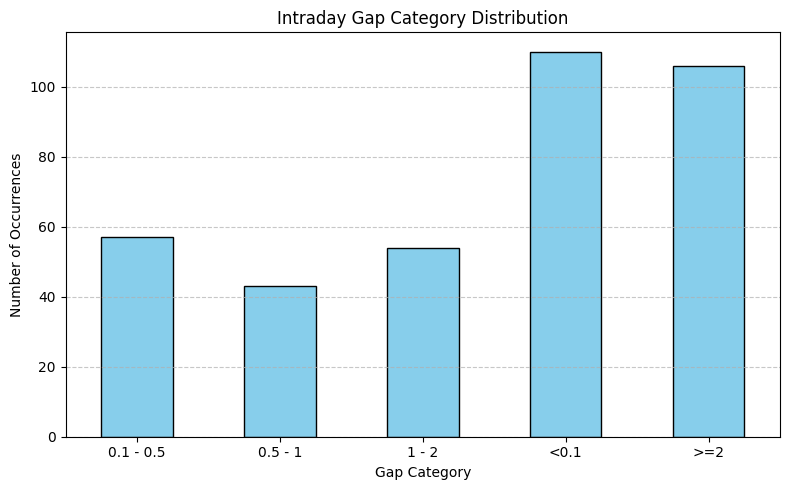

In [24]:
# Count gap categories
category_counts = before_gaps_df['Gap Category'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Intraday Gap Category Distribution')
plt.xlabel('Gap Category')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

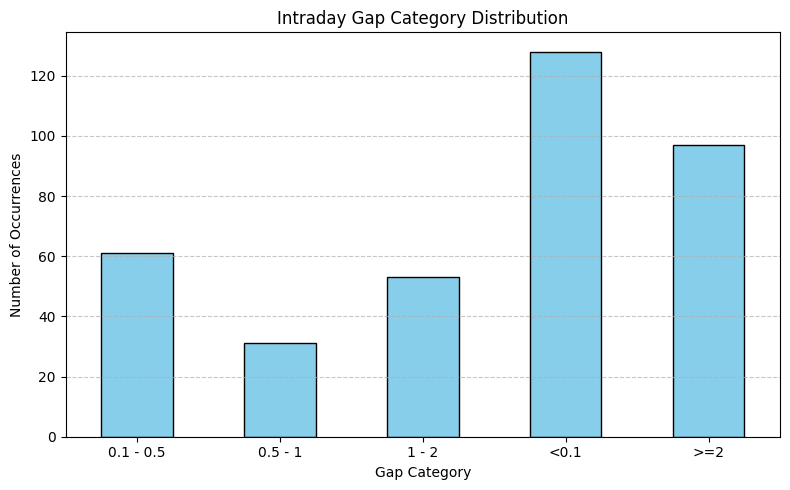

In [27]:
# Count gap categories
category_counts = after_gaps_df['Gap Category'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Intraday Gap Category Distribution')
plt.xlabel('Gap Category')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
print((after_gaps_df['Gap Values']>0.1).sum())

212
